# **Aim 1**

+ download pdb file
+ calculate phi/psi for specific residue
+ show ramachandran plot

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# do some configs to get better plot
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import matplotlib
#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
from matplotlib import pyplot as plt

import numpy as np
import pytraj as pt

In [2]:
# download trp-cage mini protein
# http://www.rcsb.org/pdb/explore.do?structureId=1l2y

traj = pt.load_pdb_rcsb('1L2Y')
print(traj)
print(set(res.name for res in traj.top.residues))

<pytraj.Trajectory, 38 frames, include:
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>>
           
{'ARG', 'TYR', 'ILE', 'ASN', 'LEU', 'ASP', 'PRO', 'SER', 'GLN', 'TRP', 'GLY', 'LYS'}


In [3]:
# calculate phi/psi for Gly residues
# need to get indcies of Gly residues
indices = [idx for idx, res in enumerate(traj.top.residues) if 'GLY' in res.name]
print('Gly resdiue indices = ', indices)

dataset = pt.multidihedral(traj, 'phi psi', resrange=indices)
print(dataset)


Gly resdiue indices =  [9, 10, 14]
<pytraj.DatasetList with 6 datasets>
phi:10
[ 110.78404243  107.09437321  108.32961461 ...,  115.32072427  162.43037555
  124.30632007]

psi:10
[  8.0792315   10.33861693  -2.0464667  ...,   5.3940854   29.34859639
   8.88098636]

phi:11
[ 55.24421349  58.27147563  60.77040425 ...,  55.64499342  51.45490984
  57.23888395]
...

phi:15
[ 67.93146641  75.78677981  75.05149804 ...,  74.12510912  79.94314603
  69.51439433]

psi:15
[ 25.21773873 -37.51912045 -31.48955407 ..., -30.50312997 -35.73264016
  20.40992958]


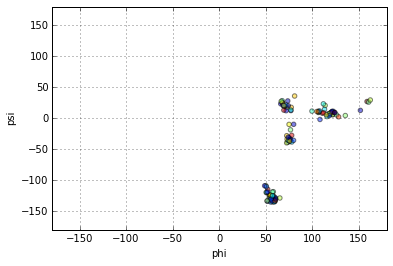

In [4]:
# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in dataset if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in dataset if 'psi' in d.key]).flatten()

# setup color
colors = np.random.rand(len(psi))

plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel('phi')
plt.ylabel('psi')
plt.grid()
plt.scatter(phi, psi, alpha=0.5, c=colors)

# Aim 2: plot phi/psi for Ala residue

In [5]:
traj = pt.iterload('ala3.dcd', 'ala3.psf')
print([res.name for res in traj.top.residues])

['ALA', 'ALA', 'ALA']


In [6]:
traj

<pytraj.TrajectoryIterator, 256 frames, include:
<Topology: 42 atoms, 3 residues, 1 mols, non-PBC>>
           

In [7]:
# only plot for residue 2 (python uses 0-based index)
phi, psi = pt.multidihedral(traj, resrange=[1,], dhtypes='psi phi')
phi, psi

(<pytraj.array.DataArray: size=256, key=phi:2, dtype=float64, ndim=1> 
 values:
 [  72.56233195 -144.69034696 -157.6298725  ..., -169.22686386 -106.44474766
   -99.7414326 ],
 <pytraj.array.DataArray: size=256, key=psi:2, dtype=float64, ndim=1> 
 values:
 [ -90.99678175  -92.85953579  147.31402474 ...,   18.49491339   66.60815057
    22.05998055])

In [8]:
from matplotlib import pyplot as plt
import seaborn as snb

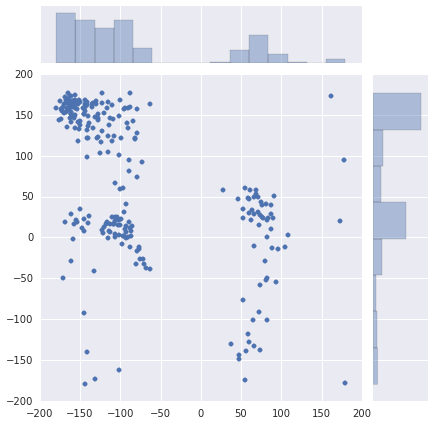

In [9]:
snb.jointplot(phi, psi, kind='scatter', stat_func=None)
#plt.savefig('phipsi_ala3.png')